## Download data  

In [ ]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 14.5MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

## Load Data

In [ ]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = torch.tensor(X, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

In [ ]:
print(X)

tensor([[ 0.0000e+00,  0.0000e+00],
        [ 9.6008e-04,  1.0055e-02],
        [ 1.0459e-02,  1.7284e-02],
        [ 8.7922e-04,  3.0290e-02],
        [ 9.9173e-03,  3.9168e-02],
        [ 6.7728e-03,  5.0049e-02],
        [ 1.4191e-02,  5.8921e-02],
        [ 3.1158e-02,  6.3472e-02],
        [-8.0324e-03,  8.0408e-02],
        [ 4.4474e-02,  7.9287e-02],
        [ 4.4275e-02,  9.0790e-02],
        [ 1.3566e-02,  1.1028e-01],
        [ 4.5101e-02,  1.1251e-01],
        [ 8.1822e-02,  1.0270e-01],
        [ 1.0292e-01,  9.6986e-02],
        [ 1.0946e-01,  1.0476e-01],
        [ 9.8855e-02,  1.2786e-01],
        [ 1.3391e-01,  1.0749e-01],
        [ 1.6729e-01,  7.1226e-02],
        [ 1.7056e-01,  8.7990e-02],
        [ 1.4095e-01,  1.4472e-01],
        [ 1.2861e-01,  1.6868e-01],
        [ 1.4243e-01,  1.7058e-01],
        [ 1.9089e-01,  1.3242e-01],
        [ 1.8765e-01,  1.5348e-01],
        [ 1.9400e-01,  1.6166e-01],
        [ 2.3511e-01,  1.1703e-01],
        [ 2.3811e-01,  1.329

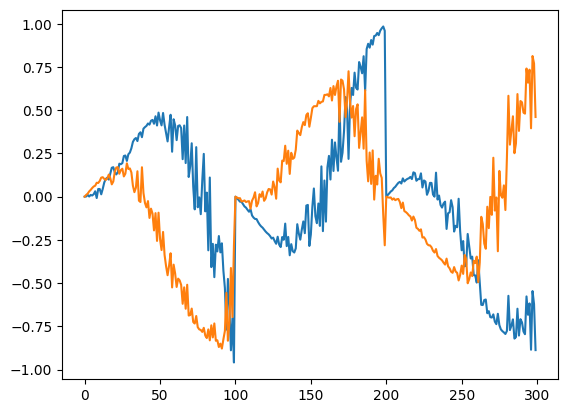

In [ ]:
plt.plot(X, label='X')

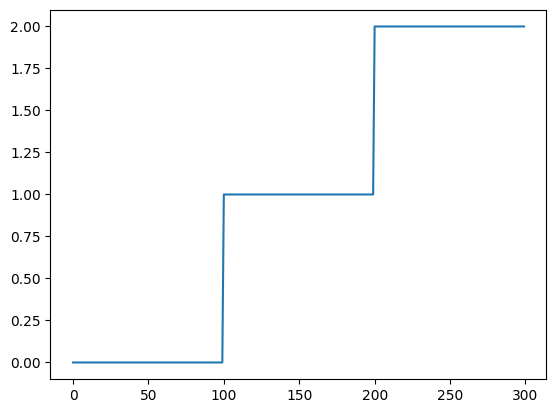

In [ ]:
plt.plot(labels, label='labels')

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
train_dataset = CustomDataset(X, labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

### Softmax Regression

In [ ]:
######################### YOUR CODE HERE #########################
# Thiết kế model theo yêu cầu đề  bài
# Linear layer in_features = input_dims (2), out_features = num_classes (3)

class SoftMaxRegression(nn.Module):
    def __init__(self, input_dims, num_classes):
      super(SoftMaxRegression, self).__init__()
      self.linear = nn.Linear(input_dims, num_classes)

    def forward(self, x):
      out = self.linear(x)
      return out
##################################################################

model = SoftMaxRegression(input_dims=2, num_classes=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
num_epochs = 200
train_losses = []
train_acc = []

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0
  accuracy = 0
  cnt = 0
  for X, y in train_loader:
    X, y = X.to(device), y.to(device)
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    accuracy += (torch.argmax(outputs, 1) == y).sum().item()
    cnt += len(y)
  train_loss /= len(train_loader)
  train_losses.append(train_loss)
  accuracy /= cnt
  train_acc.append(accuracy)

  print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {train_loss:.4f},  Train_acc: {accuracy:.4f}")

Epoch 1/200, Train_Loss: 1.0762,  Train_acc: 0.4633
Epoch 2/200, Train_Loss: 1.0331,  Train_acc: 0.4667
Epoch 3/200, Train_Loss: 1.0022,  Train_acc: 0.5333
Epoch 4/200, Train_Loss: 0.9762,  Train_acc: 0.5667
Epoch 5/200, Train_Loss: 0.9578,  Train_acc: 0.5700
Epoch 6/200, Train_Loss: 0.9458,  Train_acc: 0.5400
Epoch 7/200, Train_Loss: 0.9235,  Train_acc: 0.5333
Epoch 8/200, Train_Loss: 0.9158,  Train_acc: 0.5267
Epoch 9/200, Train_Loss: 0.9020,  Train_acc: 0.5200
Epoch 10/200, Train_Loss: 0.8903,  Train_acc: 0.5267
Epoch 11/200, Train_Loss: 0.8763,  Train_acc: 0.5200
Epoch 12/200, Train_Loss: 0.8696,  Train_acc: 0.5100
Epoch 13/200, Train_Loss: 0.8693,  Train_acc: 0.5233
Epoch 14/200, Train_Loss: 0.8601,  Train_acc: 0.5333
Epoch 15/200, Train_Loss: 0.8523,  Train_acc: 0.5300
Epoch 16/200, Train_Loss: 0.8413,  Train_acc: 0.5433
Epoch 17/200, Train_Loss: 0.8375,  Train_acc: 0.5300
Epoch 18/200, Train_Loss: 0.8423,  Train_acc: 0.5400
Epoch 19/200, Train_Loss: 0.8222,  Train_acc: 0.5433
Ep

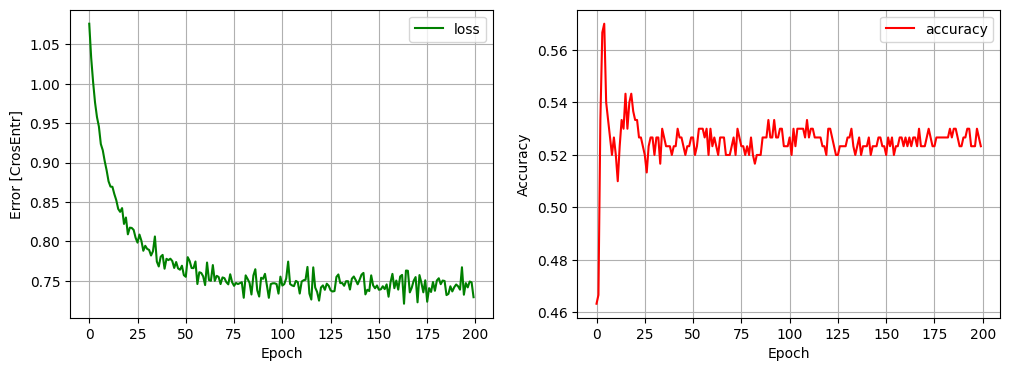

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)